Part 0: Preprocessing
- remove any superfluous data. 
- check for null values
- check for repetition. 
- check for outliers 


Part 1: Analysis

- Describe the demographic details of people most likely to pass the test
-- plot each data point against likelihood to pass. This could be done with bar charts/scatter plots/histograms/check my viz document for ideas. Each should be plotted against pass to see the impact. 
-- this is referring to age/nationality/language
- Describe the efficacy of the two interventions - the test prep course and the Dojo class
-- i should look at my data vis doc to get ideas. i could plot dc/tp and pass together.
-- compare these two features 
- Identify any other interesting trends from the data set and offer some analysis as to their importance or cause.
-- here i can talk about hours studied. 
-- run through some of the other techniques in data viz or my useful code.
-- the relationship between age and time studied is somewhat correlated. 
-- this may indicate why age appears to have some impact on the pass rate.


Part 2: Model
- i could try imputing for the hours studied
- i should also encode country, language and sex 







In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os

plt.rcParams['font.size'] = 14
plt.figure(figsize=(12,5))


<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

In [19]:
path = f"{os.getcwd()}/../raw_data/test_data.tsv"
df = pd.read_csv(path, sep='\t')
df.head()

,sex,lang,country,age,first,last,hours_studied,dojo_class,test_prep,pass,notes
0,Male,Japanese,Japan,20,Juurou,Hayashi,10.578594,True,False,True,NaN
1,Male,Japanese,Japan,22,Ryūji,Yamasaki,7.814520,False,False,True,NaN
2,Male,Japanese,Japan,27,Ryūnosuke,Inoue,4.213682,False,False,True,NaN
3,Male,Japanese,Japan,24,Shin,Kobayashi,NaN,False,False,True,NaN
4,Female,Japanese,Japan,21,Ran,Ono,3.248907,False,False,False,NaN


In [20]:
df.nunique()
# all appears to be normal. 


sex                 2
lang                6
country            10
age                33
first            1180
last              903
hours_studied    3018
dojo_class          2
test_prep           2
pass                2
notes             393
dtype: int64

In [21]:
df.isnull().sum()
# only hours studied and notes are lacking. 


sex                 0
lang                0
country             0
age                 0
first               0
last                0
hours_studied    1982
dojo_class          0
test_prep           0
pass                0
notes            4228
dtype: int64

In [22]:
df.notes.unique()
# The notes do not appear to be relevant to studying so I will ignore them at this stage. 
df = df.drop(['notes','first','last'],axis=1)

In [23]:
df.describe()

,age,hours_studied
count,5000.000000,3018.000000
mean,25.873400,4.964076
std,7.349978,3.203037
min,18.000000,0.139203
25%,20.000000,2.555823
50%,24.000000,4.247235
75%,30.000000,6.660737
max,50.000000,24.259314


In [24]:
df.describe(include=['O'])

,sex,lang,country
count,5000,5000,5000
unique,2,6,10
top,Male,Japanese,Japan
freq,3719,4022,4022


## Graphing

The above pairplot gives some indication of the nature of the relationships between the aforementioned primary features and pass rate. These are as follows

1. Dojo Class attendance with Pass Rate
- The majority of students did not attend the Dojo course
- The majority of students who attended the Dojo passed
- The majority of students who did not attend the Dojo failed

2. Test Prep attendance with Pass Rate
- The majority of students did not attend the test prep course
- For students who attended the test prep course, an approximately equal number passed and failed
- The majority of students who who did not attend the test prep course failed, this difference was less than with the dojo. 

3. Age with Pass Rate
- The lower the age, the lower the pass rate became
- Students younger than 36 were slightly more likely to fail than pass
- Students older than 36 slightly more likely to pass than fail


## Analytics 1.1 Demographics

- Describe the demographic details of people most likely to pass the test
- plot each data point against likelihood to pass. This could be done with bar charts/scatter plots/histograms/check my viz document for ideas. Each should be plotted against pass to see the impact. 
- this is referring to age/nationality/language

                 pass
country              
Finland      0.377778
Italy        0.420690
Spain        0.440678
Australia    0.462687
Japan        0.466186
UK           0.471545
France       0.492188
Mexico       0.493151
New Zealand  0.496183
USA          0.514286


<AxesSubplot:xlabel='country'>

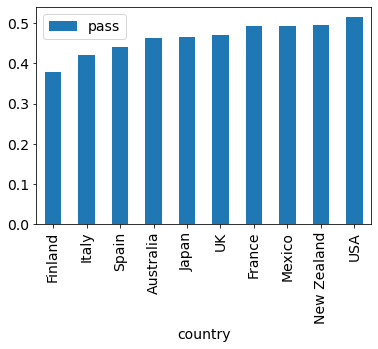

In [25]:
#pass rate by country
country_pr = df[['country','pass']].groupby('country').sum()/df[['country','pass']].groupby('country').count()
print(country_pr.sort_values(by='pass'))
country_pr.sort_values(by='pass').plot(kind='bar')


# all countries had a pass rate of between 0.38 and 0.51. 
# The lowest pass rate was Finland and the highest was USA. 

              pass
lang              
Finnish   0.377778
Italian   0.420690
Japanese  0.466186
Spanish   0.469697
English   0.486742
French    0.492188


<AxesSubplot:xlabel='lang'>

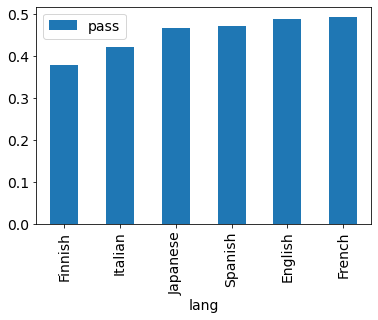

In [26]:
#pass rate by language
lang_pr = (df[['lang','pass']].groupby('lang').sum()/df[['lang','pass']].groupby('lang').count())
print(lang_pr.sort_values(by='pass'))
lang_pr.sort_values(by='pass').plot(kind='bar')

# all languages had a pass rate of between 0.38 and 0.49. 
# The lowest pass rate was Finnish and the highest was French. 


<AxesSubplot:xlabel='age', ylabel='Density'>

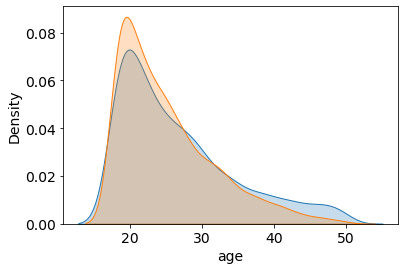

In [27]:
sns.kdeplot(data=df.age[df['pass']],shade='red')
# blue is a pass
sns.kdeplot(data=df.age[df['pass']==False], shade='blue')
# orange is a fail.

# Age with Pass Rate
# - The pass rate was lowest for students aged 20 years old. The pass rate then gradually increases with age, peaking for students aged 50. 
# - Students younger than 36 were slightly more likely to fail than pass
# - Students older than 36 were slightly more likely to pass than fail


## Analytics 1.2 Intervention Comparison

- Describe the efficacy of the two interventions - the test prep course and the Dojo class
-- i should look at my data vis doc to get ideas. i could plot dc/tp and pass together.
-- compare these two features 

1. Dojo Class attendance with Pass Rate
- The majority of students did not attend the Dojo course
- The majority of students who attended the Dojo passed
- The majority of students who did not attend the Dojo failed

2. Test Prep attendance with Pass Rate
- The majority of students did not attend the test prep course
- For students who attended the test prep course, an approximately equal number passed and failed
- The majority of students who who did not attend the test prep course failed, this difference was less than with the dojo. 

<AxesSubplot:xlabel='dojo_class', ylabel='Density'>

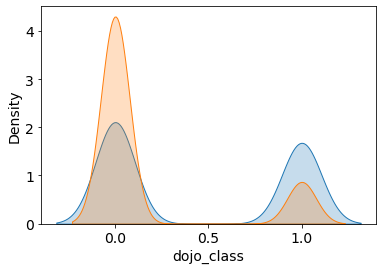

In [55]:
sns.kdeplot(data=df.dojo_class[df['pass']],shade='red')
sns.kdeplot(data=df.dojo_class[df['pass']==False],shade='blue')



<AxesSubplot:xlabel='test_prep', ylabel='Density'>

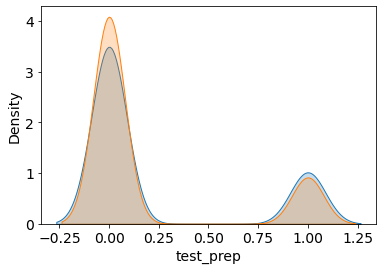

In [54]:
sns.kdeplot(data=df.test_prep[df['pass']],shade='red')
sns.kdeplot(data=df.test_prep[df['pass']==False], shade='blue')

## Analytics 1.3 Interesting Trends


- Identify any other interesting trends from the data set and offer some analysis as to their importance or cause.
-- here i can talk about hours studied. 
-- run through some of the other techniques in data viz or my useful code.
-- the relationship between age and time studied is somewhat correlated. 
-- this may indicate why age appears to have some impact on the pass rate.

<AxesSubplot:>

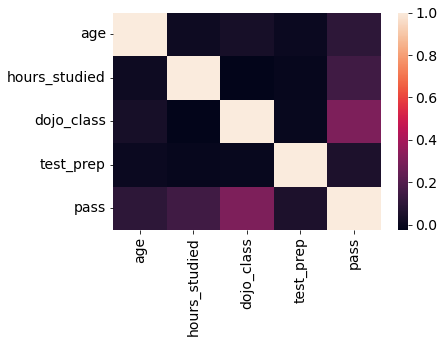

In [51]:
sns.heatmap(df.corr())

The above heatmap shows us that most variables are not correlated. The highest correlated variables are as follows (descending order):
1. Dojo Class attendance with Pass Rate
2. Hours Studied with Pass Rate
3. Age with Pass Rate

These would appear to be my primary features influencing Pass Rate.

I will also investigate the role of the test prep course in relation to pass rate, as the challenge instructs. 

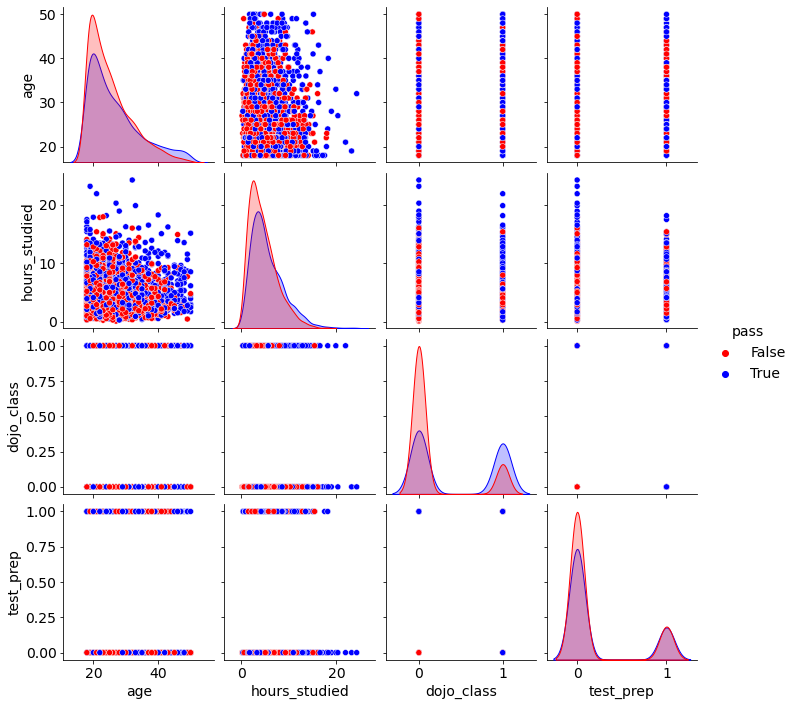

In [31]:
plt.Figure(figsize=(10,10))
sns.pairplot(data=df,hue='pass', palette=['red','blue'])



Hours Studied with Pass Rate
- The lower the number of hours studied, the lower the pass rate became
- Students who studied less than 8 hours were slightly more likely to fail than pass
- Students who studied more than 8 hours were slightly more likely to pass than fail

Hours Studied with Age
- The lower the number of hours studied, the lower the pass rate became
- Students who studied less than 8 hours were slightly more likely to fail than pass
- Students who studied more than 8 hours were slightly more likely to pass than fail

## Interesting Trends

In [52]:
import plotly.express as px
plt.figure(figsize=(20, 10))
fig = px.scatter(
    df,
    x="hours_studied",
    y="age",
    color="pass",
    hover_name="country",
    opacity=0.2
    )
fig.show()



<Figure size 1440x720 with 0 Axes>